## Импорты

In [278]:
import pandas as pd
import dill
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

## Изучение данных и формирование датасета для работы

In [24]:
df_sessions = pd.read_csv("ga_sessions.csv", low_memory = False)
df_hits = pd.read_csv("ga_hits-002.csv")

In [25]:
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [26]:
df_sessions.shape

(1860042, 18)

In [27]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [28]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [29]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [30]:
df_hits.shape

(15726470, 11)

In [31]:
# создание списка целевых действий; данные действия являются одними из возможных в столбце event_action в df_hits

goal_action = ['sub_car_claim_click', 'sub_car_claim_submit_click', 
'sub_open_dialog_click', 'sub_custom_question_submit_click', 
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 
'sub_car_request_submit_click']

In [32]:
# количесвто строк df_hits, содержащих целевое действие

len(df_hits[df_hits.event_action.isin(goal_action)])

104908

In [11]:
# создание в df_sessions столбца goal_action (goal_action = 1, если пользователь совершил целевое действие хотя бы один раз;
# goal_action = 0, если пользователь не совершил целевого действия)

df_goal = df_hits[df_hits.event_action.isin(goal_action)]
df_goal

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
4016,2744563715298057088.1640258436.1640258436,2021-12-23,843092.0,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4045,3087297479839089634.1640268774.1640268774,2021-12-23,194144.0,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4046,3156966333326004302.1640206419.1640206800,2021-12-23,327223.0,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4047,3750243879753098158.1640272208.1640272208,2021-12-23,156992.0,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
4048,7518333712042258254.1640258901.1640258901,2021-12-23,170616.0,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,2021-11-13,354017.0,30,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_submit_click,NaN,NaN
15725133,965861352491898977.1636751459.1636751459,2021-11-13,172590.0,18,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN
15725134,4727705172767122620.1636818847.1636818847,2021-11-13,356120.0,43,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,uimgZZmhfLQwbKAZZfCk,NaN
15725135,4727705172767122620.1636818847.1636818847,2021-11-13,312303.0,41,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,NaN


In [125]:
session_id_set = set()
for i in range(len(df_goal)):
    session_id_set.add(df_goal.iloc[i, 0])

In [126]:
len(session_id_set)

50760

In [127]:
df = df_sessions.copy()

In [128]:
df["goal_action"] = df["session_id"].apply(lambda x : 1 if x in session_id_set else 0)

In [129]:
df.goal_action.value_counts()

0    1809728
1      50314
Name: goal_action, dtype: int64

Необходимо проверить, какое количество данных с совершенными целевыми действиями оказалось потеряно в результате преобразований.

In [130]:
len(df[df.goal_action == 1]) / len(session_id_set) * 100

99.12135539795113

1 % данных от всех данных, содержащих goal_action == 1, потерялось, что не является критическим значением. Датасет df принимается как датасет для дальнейшей работы.

## Data Preparation

### Работа с пропусками

In [131]:
df.shape

(1860042, 19)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
 18  goal_action               int64 
dtypes: int64(2), object(17)
memory usage: 269.6+ MB


In [133]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
device_model                99.12
utm_keyword                 58.17
device_os                   57.53
device_brand                19.74
utm_adcontent               18.04
utm_campaign                11.81
utm_source                   0.01
geo_city                     0.00
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
session_id                   0.00
device_category              0.00
client_id                    0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
goal_action                  0.00
dtype: float64


#### device_model

99 % данных отсутствуют; в датасете df_hits таких данных нет; релевантные способы восстановить данные этой категории отсутствуют, поэтому этот столбец удаляется из итогового датасета. 

In [134]:
df.drop(["device_model"], axis = 1, inplace=True)
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0





#### utm_keyword

Около 60 % данных отсутствуют; можно заполнить пропуски объектом типа "other"; можно попытаться найти связь между utm_keyword и utm_medium (тип привлечения) или utm_source (канал привлечения). Предпочтительно искать связь с типом привлечения, так как на каналах могут быть разные типы, а вот к каждому отдельному типу, скорее всего, привязан свой набор ключевых слов. В любом случае, затея не стопроцентная и, возможно, придется потом переделывать данный этап.

In [135]:
df.utm_keyword.unique()

array(['puhZPIYqKXeFPaUviSjo', 'IGUCNvHlhfHpROGclCit', nan, ...,
       'aCaBoYaQJPVffhjBQnut', 'RaeBwzCLChMDgYYukNOw',
       'fcXWTQaKfxbkBkBnzLhK'], dtype=object)

In [136]:
df.utm_keyword.nunique()

1219

In [137]:
utm_keyword_dict = dict(df.utm_keyword.value_counts(normalize=True))

In [138]:
for key, value in utm_keyword_dict.items():
    if utm_keyword_dict[key] > 0.01:
        print(f"{key} : {value}")

puhZPIYqKXeFPaUviSjo : 0.6514542128920886
aXQzDWsJuGXeBXexNHjc : 0.03115885863536513
pHqgLcdBQPSLcrTpLkdr : 0.017695804910402697
ITfrGJNwVsHBGJMAKoct : 0.01716365823844027
hAmNSZmQkKQKAjZEGlgb : 0.014520920176713827
UKNBOHebRIIsQRsjNKay : 0.014069752346136988


In [139]:
df.utm_medium.unique()

array(['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm',
       'stories', 'blogger_channel', 'blogger_stories', 'email', 'app',
       'vk_smm', 'cpv', 'push', 'partner', 'tg', 'cpa', 'post',
       'smartbanner', 'info_text', 'outlook', 'clicks', 'landing',
       'blogger_header', 'qr', '(not set)', 'fb_smm', 'nkp', 'google_cpc',
       'sms', 'article', 'users_msk', 'static', 'ok_smm', 'cbaafe',
       'Sbol_catalog', 'landing_interests', 'yandex_cpc', 'web_polka',
       'linktest', 'sber_app', 'CPM', 'medium', 'tablet', 'promo_sbol',
       'reach', 'desktop', 'dom_click', 'social', 'catalogue',
       'main_polka', 'last', 'link', 'qrcodevideo', 'promo_sber'],
      dtype=object)

In [140]:
utm_medium_to_keyword_dict = dict()
utm_medium_list = list(df.utm_medium.unique())

for elem in utm_medium_list:
    utm_medium_to_keyword_dict[elem] = []

In [141]:
for i in range(len(df)):
    utm_medium_to_keyword_dict[df.loc[i, "utm_medium"]].append(df.loc[i, "utm_keyword"])

In [142]:
utm_medium_to_keyword_dict

{'banner': ['puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  nan,
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  nan,
  nan,
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  nan,
  nan,
  nan,
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  nan,
  'puhZPIYqKXeFPaUviSjo',
  'puhZPIYqKXe

In [143]:
for key in utm_medium_to_keyword_dict.keys():
    df_for_cicle = pd.DataFrame(utm_medium_to_keyword_dict[key])
    print(f"{key} :")
    print(f"{df_for_cicle.value_counts(dropna=False)}")
    print()

banner :
puhZPIYqKXeFPaUviSjo    320578
NaN                     231694
dtype: int64

cpm :
NaN                     126389
pHqgLcdBQPSLcrTpLkdr     13759
IGUCNvHlhfHpROGclCit      7557
RkpOyeEPgcMBSDuHLQcj      6962
BmOOOIoWGHEfxEfoUezs      6585
                         ...  
boDYuHrZiSvkgDtUaXHb         1
qFcyispArlKUQmFENgzo         1
IDWhodWXNlhqNKuwyLiv         1
KLznuVEblkSupUDWtCge         1
sTkjcuMUikyInvCPLqNT         1
Length: 152, dtype: int64

cpc :
NaN                     291782
puhZPIYqKXeFPaUviSjo     23718
ITfrGJNwVsHBGJMAKoct     13225
hAmNSZmQkKQKAjZEGlgb     11189
JajANoFxoqXfKRNBUhzx      6676
                         ...  
UDwbPOvNChIeCDrGWlDQ         1
pczkWraIVRIheALfnmZp         1
UCpELiEcSpcQwocxJRuB         1
pmvTbUlmnwAkuHIbvKUg         1
AAAErobiSFtAsFTjJzGU         1
Length: 998, dtype: int64

organic :
NaN                     29049
aXQzDWsJuGXeBXexNHjc    23580
UKNBOHebRIIsQRsjNKay     8988
puhZPIYqKXeFPaUviSjo     1316
ITfrGJNwVsHBGJMAKoct       16
JajANoF

In [144]:
df_attempt_from_medium = df.copy()

In [145]:
utm_medium_dict = dict()

for elem in utm_medium_list:
    if df_attempt_from_medium[df_attempt_from_medium.utm_medium == elem].utm_keyword.nunique() > 0:
        utm_medium_dict[elem] = list(df_attempt_from_medium[df_attempt_from_medium.utm_medium == elem].utm_keyword.mode())[0]
    else:
        utm_medium_dict[elem] = list(df_attempt_from_medium[df_attempt_from_medium.utm_medium == elem].utm_keyword.mode(dropna=False))[0]

In [146]:
utm_medium_dict

{'banner': 'puhZPIYqKXeFPaUviSjo',
 'cpm': 'pHqgLcdBQPSLcrTpLkdr',
 'cpc': 'puhZPIYqKXeFPaUviSjo',
 'organic': 'aXQzDWsJuGXeBXexNHjc',
 '(none)': 'puhZPIYqKXeFPaUviSjo',
 'referral': 'puhZPIYqKXeFPaUviSjo',
 'smm': 'puhZPIYqKXeFPaUviSjo',
 'stories': 'puhZPIYqKXeFPaUviSjo',
 'blogger_channel': 'puhZPIYqKXeFPaUviSjo',
 'blogger_stories': 'puhZPIYqKXeFPaUviSjo',
 'email': 'puhZPIYqKXeFPaUviSjo',
 'app': 'puhZPIYqKXeFPaUviSjo',
 'vk_smm': 'puhZPIYqKXeFPaUviSjo',
 'cpv': 'YGYMDHtQgUvxgMZvXaZM',
 'push': 'puhZPIYqKXeFPaUviSjo',
 'partner': 'puhZPIYqKXeFPaUviSjo',
 'tg': 'puhZPIYqKXeFPaUviSjo',
 'cpa': 'gEydMgyogRBSsihrQQwd',
 'post': 'puhZPIYqKXeFPaUviSjo',
 'smartbanner': 'puhZPIYqKXeFPaUviSjo',
 'info_text': 'APGNmHDNvDcuqsaRbeNw',
 'outlook': 'puhZPIYqKXeFPaUviSjo',
 'clicks': 'puhZPIYqKXeFPaUviSjo',
 'landing': 'puhZPIYqKXeFPaUviSjo',
 'blogger_header': 'puhZPIYqKXeFPaUviSjo',
 'qr': 'puhZPIYqKXeFPaUviSjo',
 '(not set)': 'puhZPIYqKXeFPaUviSjo',
 'fb_smm': 'puhZPIYqKXeFPaUviSjo',
 'nkp':

In [147]:
for i in range(len(df_attempt_from_medium)):
    if len(str(df_attempt_from_medium.loc[i, "utm_keyword"])) == 3:
        df_attempt_from_medium.loc[i, "utm_keyword"] = utm_medium_dict[df_attempt_from_medium.loc[i, "utm_medium"]]

In [148]:
df_attempt_from_medium[(df_attempt_from_medium.utm_keyword.isna()) & (df_attempt_from_medium.goal_action == 1)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
612373,3490849334188555017.1624534643.1624534643,812776697.1622653705,2021-06-24,14:00:00,17,eimRuUrNhZLAYcwRrNXu,social,CqFuKxSYgtGbcafqJwij,MGatbcZxAUUBKBwPWOkg,NaN,desktop,NaN,NaN,2560x1440,Chrome,Russia,Omsk,1


In [149]:
df_attempt_from_medium.dropna(subset=["utm_keyword"], inplace=True)

In [150]:
df_attempt_from_medium.utm_keyword.isna().sum()

0

In [151]:
round(df_attempt_from_medium.utm_keyword.value_counts(normalize=True), 2)

puhZPIYqKXeFPaUviSjo    0.76
pHqgLcdBQPSLcrTpLkdr    0.08
aXQzDWsJuGXeBXexNHjc    0.03
ITfrGJNwVsHBGJMAKoct    0.01
hAmNSZmQkKQKAjZEGlgb    0.01
                        ... 
chmITvDSGkTMoJvvoUQz    0.00
iSHFQRYsNeVeKceWxpSo    0.00
ftzglDOsVtFrEijJtTQp    0.00
ybfIjhEttEbKGTavrHfV    0.00
fcXWTQaKfxbkBkBnzLhK    0.00
Name: utm_keyword, Length: 1219, dtype: float64

In [152]:
for key, value in utm_keyword_dict.items():
    if utm_keyword_dict[key] > 0.01:
        print(f"{key} : {value}")

puhZPIYqKXeFPaUviSjo : 0.6514542128920886
aXQzDWsJuGXeBXexNHjc : 0.03115885863536513
pHqgLcdBQPSLcrTpLkdr : 0.017695804910402697
ITfrGJNwVsHBGJMAKoct : 0.01716365823844027
hAmNSZmQkKQKAjZEGlgb : 0.014520920176713827
UKNBOHebRIIsQRsjNKay : 0.014069752346136988


(!) Данный способ заполнения вызывает вопросы, так что, возможно, придется с этим поработать в дальнейшем.

In [153]:
df = df_attempt_from_medium.copy()

In [154]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,puhZPIYqKXeFPaUviSjo,mobile,NaN,Xiaomi,393x786,Chrome,Russia,Moscow,0


#### device_os

In [155]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
device_os                   57.53
device_brand                19.74
utm_adcontent               18.04
utm_campaign                11.81
utm_source                   0.01
session_id                   0.00
geo_city                     0.00
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
utm_keyword                  0.00
device_category              0.00
client_id                    0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
goal_action                  0.00
dtype: float64


Каждый бренд устройства имеет определённый тип ОС, так что на лицо прямая связь со столбцом device_brand.

In [156]:
df.device_brand.unique()

array(['Huawei', 'Samsung', 'Xiaomi', 'Apple', 'Lenovo', nan, 'Vivo',
       'Meizu', 'OnePlus', '(not set)', 'BQ', 'Realme', 'OPPO', 'itel',
       'Philips', 'Nokia', 'Alcatel', 'LG', 'Tecno', 'Asus', 'Infinix',
       'Sony', 'ZTE', 'Wiko', 'Google', 'Micromax', 'Blackview',
       'Oukitel', 'Wileyfox', 'Motorola', 'HOMTOM', 'Cubot', 'DOOGEE',
       'China Phone', 'DEXP', 'Neffos', 'TP-Link', 'Hisense', 'Acer',
       'Vsmart', 'BlackBerry', 'Umidigi', 'Leagoo', 'Highscreen',
       'Ulefone', 'HTC', 'Symphony', 'LeEco', 'Prestigio', 'POCO',
       'Vestel', 'Guophone', 'Vertex', 'CAT', 'InFocus', 'TCL',
       'SonyEricsson', 'Inoi', 'Nomu', 'Sharp', 'Jiake', 'ZOJI', 'Yuntab',
       'Mozilla', 'Vernee', 'Tele2', 'H96', 'Kyocera', 'Karbonn', 'BLU',
       'Haier', 'Kingplay', 'Coolpad', 'MTC', 'LeTV', 'iNew', 'A1',
       'Gionee', 'General Mobile', 'Digma', 'Yota Devices', 'Gome',
       'Egreat', 'Kata', 'Mito', 'Poptel', 'Flylion', 'AGM', 'SenseIT',
       'Archos', 'Teclast',

In [157]:
df.device_os.unique()

array(['Android', nan, 'iOS', 'Windows', 'Linux', 'Macintosh',
       '(not set)', 'Chrome OS', 'BlackBerry', 'Tizen', 'Firefox OS',
       'Samsung', 'Windows Phone', 'Nokia'], dtype=object)

In [158]:
df.device_category.unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [159]:
df[df.device_os == "Macintosh"].device_brand.unique()

array([nan], dtype=object)

In [160]:
df[df.device_os == "iOS"].device_brand.unique()

array(['Apple', '(not set)'], dtype=object)

In [161]:
df[(df.device_brand == "Apple") & (df.device_category == "tablet") & (df.device_os.isna())]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
32,9055511191703531814.1628451110.1628451110,2108400499.1628451110,2021-08-08,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,375x667,Safari (in-app),Russia,Moscow,0
33,9055511191703531814.1628451239.1628451239,2108400499.1628451110,2021-08-08,22:00:00,2,klTrhUaShgnjIbaPmqjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,375x667,Safari (in-app),Russia,Moscow,0
970,9059788334890427528.1633623574.1633623574,2109396349.1633625224,2021-10-07,19:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,768x1024,Safari,Russia,Khabarovsk,0
3826,9072425554595917200.1625140624.1625140624,2112338681.1625140624,2021-07-01,14:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,iNaIAFVuZgYukekFQQbX,aYAcKhelKzYpXrRYknSP,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,768x1024,Safari,Russia,Povarovo,0
3903,9072775130582386214.1633453605.1633453605,2112420073.1633453606,2021-10-05,20:00:00,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,NaN,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,768x1024,Safari (in-app),Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855629,9036263574940549936.1629618993.1629618993,2103919064.1629618992,2021-08-22,10:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,768x1024,Safari,Russia,Moscow,0
1855630,9036263574940549936.1629623621.1629623621,2103919064.1629618992,2021-08-22,12:00:00,2,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,768x1024,Safari,Russia,Moscow,0
1859256,9052223531671946514.1623000338.1623000338,2107635031.1623000338,2021-06-06,20:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,768x1024,Safari,Russia,Moscow,0
1859621,9053739341594042560.1622220991.1622220991,2107987958.1622220992,2021-05-28,19:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,zPJpddwzkFqLMSYgtDqy,aYAcKhelKzYpXrRYknSP,puhZPIYqKXeFPaUviSjo,tablet,NaN,Apple,768x1024,Safari,Russia,Saint Petersburg,0


In [162]:
df_attempt_os = df.copy()

In [163]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df_attempt_os.isna().sum() / len(df_attempt_os) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
device_os                   57.53
device_brand                19.74
utm_adcontent               18.04
utm_campaign                11.81
utm_source                   0.01
session_id                   0.00
geo_city                     0.00
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
utm_keyword                  0.00
device_category              0.00
client_id                    0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
goal_action                  0.00
dtype: float64


In [164]:
for i in df_attempt_os[(df_attempt_os.device_brand == "Apple") & ((df_attempt_os.device_category == "mobile") | (df_attempt_os.device_category == "tablet")) & (df_attempt_os.device_os.isna())].index:
    df_attempt_os.loc[i, "device_os"] = "iOS"

In [165]:
for i in df_attempt_os[(df_attempt_os.device_brand == "Apple") & (df_attempt_os.device_category == "desktop") & (df_attempt_os.device_os.isna())].index:
    df_attempt_os.loc[i, "device_os"] = "Macintosh"

In [166]:
df.device_os.unique()

array(['Android', nan, 'iOS', 'Windows', 'Linux', 'Macintosh',
       '(not set)', 'Chrome OS', 'BlackBerry', 'Tizen', 'Firefox OS',
       'Samsung', 'Windows Phone', 'Nokia'], dtype=object)

In [167]:
df_attempt_os[df_attempt_os.device_os.isna()].device_brand.value_counts()

Samsung      166509
Xiaomi       147224
Huawei        96135
Realme         8195
(not set)      7767
              ...  
Jiake             1
Olla              1
Krip              1
KingSing          1
Maxvi             1
Name: device_brand, Length: 179, dtype: int64

In [168]:
df_attempt_os.device_os.fillna("Android", inplace=True)

In [169]:
df = df_attempt_os.copy()

In [170]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
device_brand                19.74
utm_adcontent               18.04
utm_campaign                11.81
utm_source                   0.01
session_id                   0.00
device_os                    0.00
geo_city                     0.00
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
utm_keyword                  0.00
device_category              0.00
client_id                    0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
goal_action                  0.00
dtype: float64


#### device_brand

In [171]:
len(df[df.device_category == "desktop"].device_brand.isna()) / len(df) * 100

19.7207920962421

In [172]:
df[df.device_category == "desktop"].device_brand.value_counts(dropna=False)

NaN          366660
Apple            72
Huawei           19
Xiaomi           10
(not set)        10
Samsung           8
Realme            5
Google            4
OPPO              4
Flexymove         3
Beelink           2
OnePlus           2
Nokia             1
Asus              1
Philips           1
Name: device_brand, dtype: int64

In [173]:
for i in df[(df.device_category == "desktop") & (df.device_os == "Macintosh")].index:
    df.loc[i, "device_brand"] = "Apple"

In [174]:
df[((df.device_category == "tablet") | (df.device_category == "mobile"))].device_brand.isna().sum()

457

In [175]:
df[((df.device_category == "tablet") | (df.device_category == "mobile")) & (df.goal_action == 1)].device_brand.isna().sum()

5

In [176]:
df.drop(df[((df.device_category == "tablet") | (df.device_category == "mobile")) & (df.device_brand.isna())].index, inplace=True)

In [177]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
device_brand                18.38
utm_adcontent               18.04
utm_campaign                11.80
utm_source                   0.01
session_id                   0.00
device_os                    0.00
geo_city                     0.00
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
utm_keyword                  0.00
device_category              0.00
client_id                    0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
goal_action                  0.00
dtype: float64


In [178]:
df.device_brand.fillna("desktop", inplace=True)

In [179]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
utm_adcontent               18.04
utm_campaign                11.80
utm_source                   0.01
session_id                   0.00
device_os                    0.00
geo_city                     0.00
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
device_brand                 0.00
utm_keyword                  0.00
device_category              0.00
client_id                    0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
goal_action                  0.00
dtype: float64


#### utm_adcontent

In [180]:
df.utm_adcontent.value_counts(dropna=False)

JNHcPlZPxEMWDnRiyoBf    1006459
NaN                      335480
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: utm_adcontent, Length: 276, dtype: int64

Содержание рекламы может быть связано с параметрами utm_medium (тип привлечения) или utm_source (канал привлечения).

In [181]:
utm_medium_to_adcontent_dict = dict()

for elem in utm_medium_list:
    utm_medium_to_adcontent_dict[elem] = []
    
for i in df.index:
    utm_medium_to_adcontent_dict[df.loc[i, "utm_medium"]].append(df.loc[i, "utm_adcontent"])

In [182]:
for key in utm_medium_to_adcontent_dict.keys():
    df_for_cicle = pd.DataFrame(utm_medium_to_adcontent_dict[key])
    print(f"{key} :")
    print(f"{df_for_cicle.value_counts(dropna=False)}")
    print()

banner :
JNHcPlZPxEMWDnRiyoBf    371532
vCIpmpaGBnIQhyYNkXqp    180735
isYoUwVPnRHJczHiHQbB         4
vXARZToVDdvNhALiQtvl         1
dtype: int64

cpm :
xhoenQgDQsgfEPYNPwKO    112610
PkybGvWbaqORmxjNunqZ     51601
TuyPWsGQruPMpKvRxeBF     18184
UxrnyMlRBSOhOjytXnMG     13565
dUuXlWzvmhDSyclWRhNP     10262
yYdBRbPmBMUZHXwqGxNx      9625
WYLajZgbUhGimwBKDZUH      8602
AdeErYgVTbRcAWtHrMHq      6381
JNHcPlZPxEMWDnRiyoBf      3356
NaN                       2587
NhvfEqcSTGEZKxxvUZlj      1569
twlfGCnyRPFtCeUKaust      1020
ESUnXCsdWADovskBLvBO       499
DaehHXyBdjcdSRnPiAQn       489
nsxJgFVqhmchGMaUusie       413
LBoFGHDbSeBOgvTnNlmS       366
LxluDbGsLnaemhTtGuvB       349
xnyHaukLtAvgViiZSyBC       336
ailGqjxuJsYcAqCUFSXX        45
QEPLWgIvqPEGXcwBrsFw        37
nLphJBcyVYYXooJVlUxu        31
YTDFqIabKsQVGozQYoPf        26
htRZUQDANvNrHaxZjsjz        17
sMBIidTLSrYkjsCEvwht        14
QCjbxkecYPvHpsJxBXej        12
togKdkbomlWcHNkZFveU        12
kZBJHrVaekBwnsMoBrtF         7
YGYMDHtQgU

In [183]:
utm_source_to_adcontent_dict = dict()
utm_source_list = list(df.utm_source.unique())

for elem in utm_source_list:
    utm_source_to_adcontent_dict[elem] = []
    
for i in df.index:
    utm_source_to_adcontent_dict[df.loc[i, "utm_source"]].append(df.loc[i, "utm_adcontent"])
    
for key in utm_source_to_adcontent_dict.keys():
    df_for_cicle = pd.DataFrame(utm_source_to_adcontent_dict[key])
    print(f"{key} :")
    print(f"{df_for_cicle.value_counts(dropna=False)}")
    print()

ZpYIoDJMcFzVoPFsHGJL :
JNHcPlZPxEMWDnRiyoBf    391122
vCIpmpaGBnIQhyYNkXqp    180735
SAVVWaMghGnnvPOqMOIt      2496
qhEmhjPXvwgEHdBikgEQ      1714
EteMoEECGsaJeMnuvAZD      1410
fxKLUhFToKQtGIyvjZXQ       752
TqknwcPCMDiGGlqUtATP         4
isYoUwVPnRHJczHiHQbB         4
nRwyTPPOfIVNhlkLJjnF         3
EFePHapVShTKxBNclrhX         1
ZPBXNhWCgHfOdBZmoABG         1
vXARZToVDdvNhALiQtvl         1
dtype: int64

MvfHsxITijuriZxsqZqt :
xhoenQgDQsgfEPYNPwKO    112610
PkybGvWbaqORmxjNunqZ     59623
dUuXlWzvmhDSyclWRhNP     10262
JNHcPlZPxEMWDnRiyoBf      3702
ESMghHbAVcqVsGPVpygd         1
hmJeNYvwiBYbCdxCUNVD         1
dtype: int64

kjsLglQLzykiRbcDiGcD :
NaN                     165127
JNHcPlZPxEMWDnRiyoBf     84872
aYAcKhelKzYpXrRYknSP      4996
XKsYZiUFcdkUXQpoLKyS      4077
eOWmIGTKVDPewucDtZXG      1025
vIKILzdGQEEbEpgPefxF       741
NOBKLgtuvqYWkXQHeYWM       726
qalfRbxdosSpdWRPPVpn       574
lXYxbSFluucyYXDQeIHX       516
GaKENkrnDlLzOgREieaI       451
vilbbyUvEWbiJvxXpaNN       435
bIMf

dtype: int64

REOxIXhzBcWRzAVjELgu :
JNHcPlZPxEMWDnRiyoBf    1
dtype: int64

YCKgTzTDywjcWyQudGch :
JNHcPlZPxEMWDnRiyoBf    2
dtype: int64

MmyPhaRZgQtGHEnQbdUx :
JNHcPlZPxEMWDnRiyoBf    1
dtype: int64

WZxCpdfLzrgIfGUqxGpE :
JNHcPlZPxEMWDnRiyoBf    3
dtype: int64

akoPqAqaJrLGbjrrIVPH :
JNHcPlZPxEMWDnRiyoBf    16
dtype: int64

vMZNdWZTzqxmvcMtqFME :
JNHcPlZPxEMWDnRiyoBf    1
dtype: int64

rHNgiupMNBtKyhTaWxJY :
ywScCjfXuJyLkJMzfjEB    2
JOEvyCPYuxSjvEyTgxpg    1
jMNfDMEvJFVnXWOpECtJ    1
sRRLRHRfuQuCFolmQJrp    1
dtype: int64

opEZzhCrCCxqjKDmOcMK :
JNHcPlZPxEMWDnRiyoBf    1
dtype: int64

DsqwamlMwRgMTyspCjFR :
JNHcPlZPxEMWDnRiyoBf    3
dtype: int64

AuJjYKxJakEqFnCmyFtz :
JNHcPlZPxEMWDnRiyoBf    4
dtype: int64

NmOxMbxOBZyJqqGcWBnH :
JNHcPlZPxEMWDnRiyoBf    1
dtype: int64

NJzEnvxGTeAoWtXraOMM :
JNHcPlZPxEMWDnRiyoBf    2
dtype: int64

zGUBrOvMRpLqBkJPUsYo :
JNHcPlZPxEMWDnRiyoBf    2
dtype: int64

sbJRYgVfvcnqKJNDDYIr :
JNHcPlZPxEMWDnRiyoBf    1
dtype: int64

PsRRjEPKVbKXDDjZTzqz :
JN

In [184]:
utm_source_dict = dict()

for elem in utm_source_list:
    if df[df.utm_source == elem].utm_adcontent.nunique() > 0:
        utm_source_dict[elem] = list(df[df.utm_source == elem].utm_adcontent.mode())[0]
    else:
        utm_source_dict[elem] = "NaN"

In [185]:
utm_source_dict

{'ZpYIoDJMcFzVoPFsHGJL': 'JNHcPlZPxEMWDnRiyoBf',
 'MvfHsxITijuriZxsqZqt': 'xhoenQgDQsgfEPYNPwKO',
 'kjsLglQLzykiRbcDiGcD': 'JNHcPlZPxEMWDnRiyoBf',
 'TxKUcPpthBDPieTGmVhx': 'LcGIUNPUAmXtQJaDfFBR',
 'fDLlAcSmythWSCVMvqvL': 'JNHcPlZPxEMWDnRiyoBf',
 'gVRrcxiDQubJiljoTbGm': 'JNHcPlZPxEMWDnRiyoBf',
 'SzZERoLMmrEUEhDaYcyN': 'NaN',
 'BHcvLfOaCWvWTykYqHVe': 'JNHcPlZPxEMWDnRiyoBf',
 'klTrhUaShgnjIbaPmqjc': 'JNHcPlZPxEMWDnRiyoBf',
 'ghoaGAksqhKomdFrxgyJ': 'NhvfEqcSTGEZKxxvUZlj',
 'vFcAhRxLfOWKhvxjELkx': 'LLfCasrxQzJIyuldcuWy',
 'QxAxdyPLuQMEcrdZWdWb': 'JNHcPlZPxEMWDnRiyoBf',
 'nSReTmyFtbSjlPrTKoaX': 'JNHcPlZPxEMWDnRiyoBf',
 'ISrKoXQCxqqYvAZICvjs': 'JNHcPlZPxEMWDnRiyoBf',
 'hTjLvqNxGggkGnxSCaTm': 'JNHcPlZPxEMWDnRiyoBf',
 'RmEBuqrriAfAVsLQQmhk': 'JNHcPlZPxEMWDnRiyoBf',
 'IZEXUFLARCUMynmHNBGo': 'JNHcPlZPxEMWDnRiyoBf',
 'bByPQxmDaMXgpHeypKSM': 'JNHcPlZPxEMWDnRiyoBf',
 'jaSOmLICuBzCFqHfBdRg': 'JNHcPlZPxEMWDnRiyoBf',
 'PlbkrSYoHuZBWfYjYnfw': 'TuyPWsGQruPMpKvRxeBF',
 'dGlVSdmIlgWDyOPjfwwy': 'JNHcPlZPxEM

In [186]:
for i in df[df.utm_adcontent.isna()].index:
    df.loc[i, "utm_adcontent"] = utm_source_dict[df.loc[i, "utm_source"]]

In [187]:
len(df[(df.utm_adcontent == "NaN") & (df.goal_action == 1)])

25

In [188]:
for i in df[df.utm_adcontent == "NaN"].index:
    value = list(df.utm_adcontent.mode())[0]
    df.loc[i, "utm_adcontent"] = value

In [189]:
len(df[(df.utm_adcontent == "NaN") & (df.goal_action == 1)])

0

In [190]:
len(df[df.utm_adcontent.isna()])

0

In [191]:
df[df.utm_adcontent.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action


In [192]:
df.utm_adcontent.value_counts()

JNHcPlZPxEMWDnRiyoBf    1339110
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24464
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: utm_adcontent, Length: 275, dtype: int64

In [193]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
utm_campaign                11.80
utm_source                   0.01
session_id                   0.00
device_category              0.00
geo_city                     0.00
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
device_brand                 0.00
device_os                    0.00
utm_keyword                  0.00
client_id                    0.00
utm_adcontent                0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
goal_action                  0.00
dtype: float64


#### utm_campaign

In [194]:
df.utm_campaign.value_counts(dropna=False)

LTuZkdKfxRGVceoWkVyg    463478
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219485
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
zXjuoqEaPElBnwpSHMpx         1
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
pcvPxfVFaAmhwFmvIeYd         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 406, dtype: int64

In [195]:
utm_source_to_campaign_dict = dict()

for elem in utm_source_list:
    utm_source_to_campaign_dict[elem] = []
    
for i in df.index:
    utm_source_to_campaign_dict[df.loc[i, "utm_source"]].append(df.loc[i, "utm_campaign"])
    
for key in utm_source_to_campaign_dict.keys():
    df_for_cicle = pd.DataFrame(utm_source_to_campaign_dict[key])
    print(f"{key} :")
    print(f"{df_for_cicle.value_counts(dropna=False)}")
    print()

ZpYIoDJMcFzVoPFsHGJL :
LEoPHuyFvzoNfnzGgfcd    322783
gecBYcKZCPMcVYdSSzKP    132725
TmThBvoCcwkCZZUWACYq     26562
SgIUDYUKnyWHVowUOqid     22758
sbJRYgVfvcnqKJNDDYIr     20167
zxoiLxhuSIFrCeTLQVWZ     12339
eimRuUrNhZLAYcwRrNXu      7741
MXqmDyetMTICSSitTjWV      6983
jqlUOdZBNZYfInQVcZlS      6377
WiILFRDQbcHDHNvHzGpX      5760
UvuMsOSDBWQGOIbDbXfV      5124
ascPqxFuFewWWZSVMpkh      2993
YDIkQmcjRkpdxGbLLtNN      2611
DZlFqIVHUBIDaQoarvIZ      1555
kwdmElMUPDZaLQdgjcsI      1105
nGFPxtyrBsOYBtJhrWEk       330
mrrsABvDmholqItQOtcL       114
jfLxUKobDdJlutbwyjaU        94
zzcBKEnbRkpqxqrfLtUQ        75
fkhLOTqvIJxkHksTSIzX         9
dIOSwfBKYOHWMhxrecPD         8
MrKkyDxiricJGgQfpARh         7
LTuZkdKfxRGVceoWkVyg         7
TPmcSCdCeBenCRczRhPK         5
DWLxnPuFDXvGQTIRHNMJ         4
UNcVvIncdXEfyysCnEDP         2
nRpmmNsxMgmMTssAVHFx         2
eEEwicXmITPUhtBeyybE         1
KLznuVEblkSupUDWtCge         1
JkhCpeDGCtTwhwqWLywv         1
dtype: int64

MvfHsxITijuriZxsqZqt :
FTjNLDyTrX

dtype: int64

aCaBoYaQJPVffhjBQnut :
LTuZkdKfxRGVceoWkVyg    2
dtype: int64

LpqvupgvWJUGpCaowEIy :
LTuZkdKfxRGVceoWkVyg    3
dtype: int64

YAQGTUQbCohUIetXFGlm :
LTuZkdKfxRGVceoWkVyg    6
dtype: int64

WufphiXPXHjYKWOlEjpJ :
LTuZkdKfxRGVceoWkVyg    2
dtype: int64

yEzOkUNmavmsRTXaISLf :
LTuZkdKfxRGVceoWkVyg    3
dtype: int64

KGpIIoFhRfLgffkknBkK :
LTuZkdKfxRGVceoWkVyg    2
dtype: int64

LJZfurSmjxvomWxSCcZR :
LTuZkdKfxRGVceoWkVyg    1
dtype: int64

LBaWJEeycBIqEqUqkoqw :
LTuZkdKfxRGVceoWkVyg    1
dtype: int64

CtYDKfzJhMZZOyeUeyMX :
LTuZkdKfxRGVceoWkVyg    2
dtype: int64

REOxIXhzBcWRzAVjELgu :
LTuZkdKfxRGVceoWkVyg    1
dtype: int64

YCKgTzTDywjcWyQudGch :
LTuZkdKfxRGVceoWkVyg    2
dtype: int64

MmyPhaRZgQtGHEnQbdUx :
LTuZkdKfxRGVceoWkVyg    1
dtype: int64

WZxCpdfLzrgIfGUqxGpE :
LTuZkdKfxRGVceoWkVyg    3
dtype: int64

akoPqAqaJrLGbjrrIVPH :
LTuZkdKfxRGVceoWkVyg    16
dtype: int64

vMZNdWZTzqxmvcMtqFME :
LTuZkdKfxRGVceoWkVyg    1
dtype: int64

rHNgiupMNBtKyhTaWxJY :
KyobiyHqbFtWswycT

In [196]:
utm_medium_to_campaign_dict = dict()

for elem in utm_medium_list:
    utm_medium_to_campaign_dict[elem] = []
    
for i in df.index:
    utm_medium_to_campaign_dict[df.loc[i, "utm_medium"]].append(df.loc[i, "utm_campaign"])
    
for key in utm_medium_to_campaign_dict.keys():
    df_for_cicle = pd.DataFrame(utm_medium_to_campaign_dict[key])
    print(f"{key} :")
    print(f"{df_for_cicle.value_counts(dropna=False)}")
    print()

banner :
LEoPHuyFvzoNfnzGgfcd    322783
gecBYcKZCPMcVYdSSzKP    132725
TmThBvoCcwkCZZUWACYq     26562
SgIUDYUKnyWHVowUOqid     22758
zxoiLxhuSIFrCeTLQVWZ     12339
eimRuUrNhZLAYcwRrNXu      7741
MXqmDyetMTICSSitTjWV      6983
WiILFRDQbcHDHNvHzGpX      5760
LUlvACDKkkOkiSuiwaBs      3141
ascPqxFuFewWWZSVMpkh      2993
BVKxkCOHKUOvkpbrLMgZ      2459
DZlFqIVHUBIDaQoarvIZ      1555
kwdmElMUPDZaLQdgjcsI      1105
dZqEgyoxhtbeLFMtnnVR      1009
jfLxUKobDdJlutbwyjaU       892
isYoUwVPnRHJczHiHQbB       756
tVtbIKrPSOvrXLCznVVe       433
TxKUcPpthBDPieTGmVhx       196
TOtlRhDcJiAMnHYarArU        33
niQdLVcBlNylrEuNcCYH        22
jUuukNIbGoOYdGYzBthG        13
TPmcSCdCeBenCRczRhPK         5
LTuZkdKfxRGVceoWkVyg         3
UNcVvIncdXEfyysCnEDP         2
UgWjaOmKUxPFucSbwvSq         2
eEEwicXmITPUhtBeyybE         1
KLznuVEblkSupUDWtCge         1
dtype: int64

cpm :
FTjNLDyTrXaWYgZymFkV    233766
wWtqUernqIfFLJdJysKt      1309
izpGVnqOrUbTVctFBiaU      1266
EiQppLFrUZrUsjXVulLg      1217
WJUKqfeOrj

In [197]:
df[df.utm_campaign.isna()].utm_source.unique()

array(['kjsLglQLzykiRbcDiGcD', 'SzZERoLMmrEUEhDaYcyN',
       'BHcvLfOaCWvWTykYqHVe', 'ISrKoXQCxqqYvAZICvjs',
       'bByPQxmDaMXgpHeypKSM', 'QxAxdyPLuQMEcrdZWdWb',
       'iNFgfQPqHPBuvGCYtrQE', 'GmILPdZyuAVJCPsUBHeN',
       'RzLAoRYmCtVATSoPvWAQ', 'jaSOmLICuBzCFqHfBdRg',
       'hTjLvqNxGggkGnxSCaTm'], dtype=object)

In [198]:
utm_source_campaign_dict = dict()

for elem in utm_source_list:
    if df[df.utm_source == elem].utm_campaign.nunique() > 0:
        utm_source_campaign_dict[elem] = list(df[df.utm_source == elem].utm_campaign.mode())[0]
    else:
        utm_source_campaign_dict[elem] = "NaN"

In [199]:
utm_source_campaign_dict

{'ZpYIoDJMcFzVoPFsHGJL': 'LEoPHuyFvzoNfnzGgfcd',
 'MvfHsxITijuriZxsqZqt': 'FTjNLDyTrXaWYgZymFkV',
 'kjsLglQLzykiRbcDiGcD': 'LTuZkdKfxRGVceoWkVyg',
 'TxKUcPpthBDPieTGmVhx': 'FTjNLDyTrXaWYgZymFkV',
 'fDLlAcSmythWSCVMvqvL': 'LTuZkdKfxRGVceoWkVyg',
 'gVRrcxiDQubJiljoTbGm': 'LTuZkdKfxRGVceoWkVyg',
 'SzZERoLMmrEUEhDaYcyN': 'NaN',
 'BHcvLfOaCWvWTykYqHVe': 'LTuZkdKfxRGVceoWkVyg',
 'klTrhUaShgnjIbaPmqjc': 'LTuZkdKfxRGVceoWkVyg',
 'ghoaGAksqhKomdFrxgyJ': 'FTjNLDyTrXaWYgZymFkV',
 'vFcAhRxLfOWKhvxjELkx': 'okTXSMadDkjvntEHzIjp',
 'QxAxdyPLuQMEcrdZWdWb': 'vRLTQQKAsFQMxbcHGPhu',
 'nSReTmyFtbSjlPrTKoaX': 'LUlvACDKkkOkiSuiwaBs',
 'ISrKoXQCxqqYvAZICvjs': 'pQhDyEDSvgnXNvMXPAhy',
 'hTjLvqNxGggkGnxSCaTm': 'QEejXfOCtOMFLZqIPApp',
 'RmEBuqrriAfAVsLQQmhk': 'VBmazutCflYumtDHrQYe',
 'IZEXUFLARCUMynmHNBGo': 'ngkgBNjlzLYBofkljaBo',
 'bByPQxmDaMXgpHeypKSM': 'LTuZkdKfxRGVceoWkVyg',
 'jaSOmLICuBzCFqHfBdRg': 'bxOTvPtyGSdUrbwoXCPO',
 'PlbkrSYoHuZBWfYjYnfw': 'FTjNLDyTrXaWYgZymFkV',
 'dGlVSdmIlgWDyOPjfwwy': 'LTuZkdKfxRG

In [200]:
for i in df[df.utm_campaign.isna()].index:
    df.loc[i, "utm_campaign"] = utm_source_campaign_dict[df.loc[i, "utm_source"]]

In [201]:
len(df[df.utm_campaign.isna()])

0

In [202]:
len(df[df.utm_campaign == "NaN"])

6829

In [203]:
for i in df[df.utm_campaign == "NaN"].index:
    value = list(df.utm_campaign.mode())[0]
    df.loc[i, "utm_campaign"] = value

In [204]:
print("Процент пропущенных значений по столбцам: ")
print(f"{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}")

Процент пропущенных значений по столбцам: 
utm_source                  0.01
session_id                  0.00
device_category             0.00
geo_city                    0.00
geo_country                 0.00
device_browser              0.00
device_screen_resolution    0.00
device_brand                0.00
device_os                   0.00
utm_keyword                 0.00
client_id                   0.00
utm_adcontent               0.00
utm_campaign                0.00
utm_medium                  0.00
visit_number                0.00
visit_time                  0.00
visit_date                  0.00
goal_action                 0.00
dtype: float64


#### utm_source

In [205]:
len(df[df.utm_source.isna()])

97

In [206]:
len(df[(df.utm_source.isna()) & (df.goal_action == 1)])

5

In [207]:
df.dropna(subset=["utm_source"], inplace=True)

In [208]:
df.shape

(1859422, 18)

In [209]:
df.to_csv("df_without_omissions.csv", index=False)

### Работа с дубликатами

In [211]:
df.duplicated().sum()

0

Дубликатов не обнаружено - так даже лучше.

### Работа с ошибками

In [212]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [213]:
df.utm_medium.unique()

array(['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm',
       'stories', 'blogger_channel', 'blogger_stories', 'email', 'app',
       'vk_smm', 'cpv', 'push', 'partner', 'tg', 'cpa', 'post',
       'smartbanner', 'info_text', 'outlook', 'clicks', 'landing',
       'blogger_header', 'qr', '(not set)', 'fb_smm', 'nkp', 'google_cpc',
       'sms', 'article', 'users_msk', 'static', 'ok_smm',
       'landing_interests', 'yandex_cpc', 'linktest', 'medium', 'desktop',
       'dom_click', 'main_polka', 'link', 'promo_sber'], dtype=object)

In [214]:
df[(df.utm_medium == "(none)")]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
11,9055469620715506713.1628883994.1628883994,2108390820.1628883993,2021-08-13,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
12,9055469620715506713.1633110583.1633110583,2108390820.1628883993,2021-10-01,20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
28,9055505230298952295.1638478433.1638478433,2108399111.1638478439,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,desktop,1536x864,Chrome,Russia,Balashikha,0
29,9055507072827135870.1625692029.1625692029,2108399540.1625692030,2021-07-08,00:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x699,Chrome,Russia,Pushkino,0
30,9055507072827135870.1625694582.1625694582,2108399540.1625692030,2021-07-08,00:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x699,Chrome,Russia,Pushkino,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859402,9055345397369530035.1622009529.1622009529,2108361897.1622009523,2021-05-26,09:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1536x864,Firefox,Russia,(not set),0
1859406,9055355469082180480.1636350848.1636350848,2108364242.1636350848,2021-11-08,08:54:08,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x873,Chrome,Russia,Moscow,0
1859409,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1920x1080,Chrome,Russia,Khimki,1
1859418,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Stavropol,0


In [215]:
len(df[(df.utm_medium == "(none)") & (df.goal_action == 1)])

10531

In [216]:
df[(df.utm_medium == "(not set)")]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
14028,9117228372811440986.1636426594.1636426594,2122770150.1636426586,2021-11-09,05:56:34,1,iNFgfQPqHPBuvGCYtrQE,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Saint Petersburg,0
17049,9130968089155116617.1636081226.1636081226,2125969177.1636081225,2021-11-05,06:00:26,1,iNFgfQPqHPBuvGCYtrQE,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,414x896,Safari,Russia,(not set),0
20218,9144903415488255785.1637263046.1637263046,2129213748.1634670377,2021-11-18,22:17:26,3,WeIwsqEbpZGZwhcQktNS,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,360x800,Chrome,Russia,Moscow,0
20219,9144903415488255785.1637295862.1637295862,2129213748.1634670377,2021-11-19,07:24:22,4,WeIwsqEbpZGZwhcQktNS,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,OnePlus,360x800,Chrome,Russia,Moscow,0
23827,9160652639657579968.1637324018.1637324018,2132880650.1636357568,2021-11-19,15:13:38,3,VCREhgqUPSUkmfOTvGiW,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,desktop,1920x1080,Edge,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841357,8974027286922426989.1638693485.1638693485,2089428549.1638693485,2021-12-05,11:38:05,1,WeIwsqEbpZGZwhcQktNS,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,414x896,Safari,Russia,Bor,0
1843472,8983191243891913373.1637645316.1637645316,2091562199.1637069469,2021-11-23,08:28:36,3,VCREhgqUPSUkmfOTvGiW,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,desktop,1280x1024,Opera,Russia,Saratov,0
1850569,9015064428116524598.1629830709.1629830709,2098983253.1629830710,2021-08-24,21:00:00,1,WeIwsqEbpZGZwhcQktNS,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1440x900,Safari,Russia,Moscow,0
1854088,9031657626237725688.1624828920.1624828920,2102846658.1624828920,2021-06-28,00:00:00,1,iNFgfQPqHPBuvGCYtrQE,(not set),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,375x812,Safari,Russia,Moscow,0


In [217]:
len(df[(df.utm_medium == "(not set)") & (df.goal_action == 1)])

26

In [218]:
for i in df[(df.utm_medium == "(none)") | (df.utm_medium == "(not set)")].index:
    df.loc[i, "utm_medium"] = "no_data"

In [219]:
df.utm_medium.value_counts()

banner               552272
cpc                  434338
no_data              301011
cpm                  242083
referral             152049
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article                  17
nkp                      14
medium                    8
main_polka          

In [220]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [221]:
df.device_category.unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [222]:
df.device_os.unique()

array(['Android', 'iOS', 'Windows', 'Linux', 'Macintosh', '(not set)',
       'Chrome OS', 'BlackBerry', 'Tizen', 'Firefox OS', 'Samsung',
       'Windows Phone', 'Nokia'], dtype=object)

In [223]:
df[(df.device_os == "(not set)") & (df.goal_action == 1)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action


In [224]:
len(df[(df.device_os == "(not set)")])

364

In [225]:
df.drop(df[df.device_os == "(not set)"].index, inplace=True)

In [226]:
df[df.device_os == "Tizen"]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
178576,1553748796565705183.1635602971.1635603028,361760332.1635602911,2021-10-30,17:10:28,2,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,(not set),1920x1080,Samsung Internet,Russia,Moscow,0
974219,5105662900406565338.1637857756.1637857756,1188754779.1637857754,2021-11-25,19:29:16,1,kjsLglQLzykiRbcDiGcD,cpc,WlbWUObZWvsimzdFdLYw,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Tizen,(not set),1920x1080,Samsung Internet,Russia,Chelyabinsk,0
1034631,5377162656658628304.1638014738.1638014738,1251968242.1638014672,2021-11-27,15:05:38,1,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,(not set),1920x1080,Samsung Internet,Russia,Krasnoyarsk,0
1034632,5377162656658628304.1638016648.1638016648,1251968242.1638014672,2021-11-27,15:37:28,2,BHcvLfOaCWvWTykYqHVe,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,(not set),1920x1080,Samsung Internet,Russia,Krasnoyarsk,0
1161019,5940974008719207632.1636396244.1636396244,1383240802.1636396240,2021-11-08,21:30:44,1,kjsLglQLzykiRbcDiGcD,cpc,vVspBWANjeNCTQJpJJeE,lXYxbSFluucyYXDQeIHX,tzIeQUUHahhBuEkJqDVp,desktop,Tizen,(not set),1920x1080,Samsung Internet,Russia,Saint Petersburg,0
1494331,7428164713369750986.1635700173.1635700765,1729504371.1635700170,2021-10-31,20:19:25,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,(not set),1920x1080,Samsung Internet,Russia,Surgut,0
1552773,7686030645693099018.1632480268.1632480268,1789543462.1632480266,2021-09-24,13:44:28,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,UgWjaOmKUxPFucSbwvSq,mobile,Tizen,(not set),1920x1080,Samsung Internet,Russia,(not set),0


In [227]:
for i in df[df.device_os == "Tizen"].index:
    df.loc[i, "device_brand"] =  "Samsung"

In [228]:
df[df.device_os == "Tizen"]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
178576,1553748796565705183.1635602971.1635603028,361760332.1635602911,2021-10-30,17:10:28,2,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,Samsung,1920x1080,Samsung Internet,Russia,Moscow,0
974219,5105662900406565338.1637857756.1637857756,1188754779.1637857754,2021-11-25,19:29:16,1,kjsLglQLzykiRbcDiGcD,cpc,WlbWUObZWvsimzdFdLYw,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Tizen,Samsung,1920x1080,Samsung Internet,Russia,Chelyabinsk,0
1034631,5377162656658628304.1638014738.1638014738,1251968242.1638014672,2021-11-27,15:05:38,1,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,Samsung,1920x1080,Samsung Internet,Russia,Krasnoyarsk,0
1034632,5377162656658628304.1638016648.1638016648,1251968242.1638014672,2021-11-27,15:37:28,2,BHcvLfOaCWvWTykYqHVe,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,Samsung,1920x1080,Samsung Internet,Russia,Krasnoyarsk,0
1161019,5940974008719207632.1636396244.1636396244,1383240802.1636396240,2021-11-08,21:30:44,1,kjsLglQLzykiRbcDiGcD,cpc,vVspBWANjeNCTQJpJJeE,lXYxbSFluucyYXDQeIHX,tzIeQUUHahhBuEkJqDVp,desktop,Tizen,Samsung,1920x1080,Samsung Internet,Russia,Saint Petersburg,0
1494331,7428164713369750986.1635700173.1635700765,1729504371.1635700170,2021-10-31,20:19:25,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Tizen,Samsung,1920x1080,Samsung Internet,Russia,Surgut,0
1552773,7686030645693099018.1632480268.1632480268,1789543462.1632480266,2021-09-24,13:44:28,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,UgWjaOmKUxPFucSbwvSq,mobile,Tizen,Samsung,1920x1080,Samsung Internet,Russia,(not set),0


In [229]:
df[df.device_os == "Windows Phone"]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
563961,3274200437783465491.1635978773.1635978773,762334195.1635978771,2021-11-04,01:32:53,1,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Windows Phone,(not set),2000x2000,Internet Explorer,Sweden,Lulea,0
650829,3664725454480875803.1638539547.1638539547,853260386.1638539547,2021-12-03,16:52:27,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Windows Phone,(not set),2000x2000,Safari,United States,Ashburn,0
912808,4835458416099926724.1640964803.1640964803,1125842895.1640964804,2021-12-31,18:33:23,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Windows Phone,Nokia,2000x2000,Internet Explorer,Ireland,Dublin,0
1225645,6231093436041147329.1635791808.1635791808,1450789495.1635791809,2021-11-01,21:36:48,1,QxAxdyPLuQMEcrdZWdWb,cpc,NJzEnvxGTeAoWtXraOMM,JNHcPlZPxEMWDnRiyoBf,WaWpHWszYFymgCSbpGVL,mobile,Windows Phone,Nokia,2000x2000,Safari,United States,Forest City,0


In [230]:
df.drop(df[(df.device_os == "Windows Phone") & (df.device_brand == "(not set)")].index, inplace=True)

In [231]:
df[df.device_os == "Windows Phone"]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
912808,4835458416099926724.1640964803.1640964803,1125842895.1640964804,2021-12-31,18:33:23,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Windows Phone,Nokia,2000x2000,Internet Explorer,Ireland,Dublin,0
1225645,6231093436041147329.1635791808.1635791808,1450789495.1635791809,2021-11-01,21:36:48,1,QxAxdyPLuQMEcrdZWdWb,cpc,NJzEnvxGTeAoWtXraOMM,JNHcPlZPxEMWDnRiyoBf,WaWpHWszYFymgCSbpGVL,mobile,Windows Phone,Nokia,2000x2000,Safari,United States,Forest City,0


In [232]:
df[df.device_os == "Nokia"]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
611544,3488084865621893868.1640964844.1640964844,812133044.1640964844,2021-12-31,18:34:04,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Nokia,Nokia,2000x2000,NokiaX2-02,United States,Prineville,0
744567,4086458850307155133.1640965309.1640965309,951452844.1640965309,2021-12-31,18:41:49,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Nokia,Nokia,2000x2000,Safari,Sweden,Lulea,0
784049,4261145310650835387.1638539706.1638539706,992125205.1638539707,2021-12-03,16:55:06,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Nokia,Nokia,2000x2000,Nokia501,Ireland,Dublin,0


-

In [233]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [234]:
df.device_brand.unique()

array(['Huawei', 'Samsung', 'Xiaomi', 'Apple', 'Lenovo', 'desktop',
       'Vivo', 'Meizu', 'OnePlus', '(not set)', 'BQ', 'Realme', 'OPPO',
       'itel', 'Philips', 'Nokia', 'Alcatel', 'LG', 'Tecno', 'Asus',
       'Infinix', 'Sony', 'ZTE', 'Wiko', 'Google', 'Micromax',
       'Blackview', 'Oukitel', 'Wileyfox', 'Motorola', 'HOMTOM', 'Cubot',
       'DOOGEE', 'China Phone', 'DEXP', 'Neffos', 'TP-Link', 'Hisense',
       'Acer', 'Vsmart', 'BlackBerry', 'Umidigi', 'Leagoo', 'Highscreen',
       'Ulefone', 'HTC', 'Symphony', 'LeEco', 'Prestigio', 'POCO',
       'Vestel', 'Guophone', 'Vertex', 'CAT', 'InFocus', 'TCL',
       'SonyEricsson', 'Inoi', 'Nomu', 'Sharp', 'Jiake', 'ZOJI', 'Yuntab',
       'Mozilla', 'Vernee', 'Tele2', 'H96', 'Kyocera', 'Karbonn', 'BLU',
       'Haier', 'Kingplay', 'Coolpad', 'MTC', 'LeTV', 'iNew', 'A1',
       'Gionee', 'General Mobile', 'Digma', 'Yota Devices', 'Gome',
       'Egreat', 'Kata', 'Mito', 'Poptel', 'Flylion', 'AGM', 'SenseIT',
       'Archos', 'Tec

In [235]:
for i in df[(df.device_brand == "(not set)") & (df.device_browser == "Samsung Internet")].index:
    df.loc[i, "device_brand"] = "Samsung"

In [236]:
for i in df[(df.device_brand == "(not set)") & (df.device_category == "desktop")].index:
    df.loc[i, "device_brand"] = "desktop"

In [237]:
for i in df[(df.device_brand == "(not set)") & (df.device_os == "iOS")].index:
    df.loc[i, "device_brand"] = "Apple"

In [238]:
df[(df.device_brand == "(not set)")].device_category.unique()

array(['mobile', 'tablet'], dtype=object)

In [239]:
for i in df[(df.device_brand == "(not set)") & (df.device_category == "mobile")].index:
    df.loc[i, "device_brand"] = "mobile"

In [240]:
for i in df[(df.device_brand == "(not set)") & (df.device_category == "tablet")].index:
    df.loc[i, "device_brand"] = "tablet"

-

In [241]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android Webview', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram 208.0.0.32.135 Android',
       'Instagram 209.0.0.21.119 Android', 'Android Runtime',
       'UC Browser', '(not set)', 'Mozilla Compatible Agent', 'Mozilla',
       'Opera Mini', 'Coc Coc', 'Android', '[FBAN', 'Internet Explorer',
       'Puffin', 'MRCHROME', 'com.vk.vkclient',
       'Instagram 202.0.0.23.119', 'Android Browser', 'Maxthon',
       'Instagram 207.0.0.28.118', 'Instagram 216.0.0.12.135',
       'Instagram 199.1.0.34.119 Android', 'Instagram 192.0.0.37.119',
       'Amazon Silk', 'SeaMonkey', 'Instagram 194.0.0.36.172 Android',
       'Instagram 202.0.0.37.123 Android', 'MyApp', 'NetFront',
       'Instagram 201.0.0.23.111', 'Instagram 203.0.0.26.117',
       'Instagram 192.0.0.35.123 Android', 'Instagram 208.0.0.26.131',
       'MT6735_TD', 'Instagram 199.0.0.27.120', 'NokiaX2-02',
       'Instagram 158.0.0.30.123 Andro

In [242]:
browser_Instagram_list = list()

for elem in df.device_browser.unique():
    if elem.split()[0] == "Instagram":
        browser_Instagram_list.append(elem)

browser_Instagram_list

['Instagram 208.0.0.32.135 Android',
 'Instagram 209.0.0.21.119 Android',
 'Instagram 202.0.0.23.119',
 'Instagram 207.0.0.28.118',
 'Instagram 216.0.0.12.135',
 'Instagram 199.1.0.34.119 Android',
 'Instagram 192.0.0.37.119',
 'Instagram 194.0.0.36.172 Android',
 'Instagram 202.0.0.37.123 Android',
 'Instagram 201.0.0.23.111',
 'Instagram 203.0.0.26.117',
 'Instagram 192.0.0.35.123 Android',
 'Instagram 208.0.0.26.131',
 'Instagram 199.0.0.27.120',
 'Instagram 158.0.0.30.123 Android',
 'Instagram 213.0.0.19.117']

In [243]:
for i in df[(df.device_browser.isin(browser_Instagram_list))].index:
    df.loc[i, "device_browser"] = "Instagram"

In [244]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android Webview', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'Android Runtime', 'UC Browser', '(not set)',
       'Mozilla Compatible Agent', 'Mozilla', 'Opera Mini', 'Coc Coc',
       'Android', '[FBAN', 'Internet Explorer', 'Puffin', 'MRCHROME',
       'com.vk.vkclient', 'Android Browser', 'Maxthon', 'Amazon Silk',
       'SeaMonkey', 'MyApp', 'NetFront', 'MT6735_TD', 'NokiaX2-02',
       'Nokia501', 'Phantom Browser', 'com.zhiliaoapp.musically',
       'Konqueror', 'Iron', 'Threads 202.0.0.23.119'], dtype=object)

In [245]:
for i in df[(df.device_browser == "Mozilla") | (df.device_browser == "Mozilla Compatible Agent")].index:
    df.loc[i, "device_browser"] = "Firefox"

In [246]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android Webview', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'Android Runtime', 'UC Browser', '(not set)',
       'Opera Mini', 'Coc Coc', 'Android', '[FBAN', 'Internet Explorer',
       'Puffin', 'MRCHROME', 'com.vk.vkclient', 'Android Browser',
       'Maxthon', 'Amazon Silk', 'SeaMonkey', 'MyApp', 'NetFront',
       'MT6735_TD', 'NokiaX2-02', 'Nokia501', 'Phantom Browser',
       'com.zhiliaoapp.musically', 'Konqueror', 'Iron',
       'Threads 202.0.0.23.119'], dtype=object)

In [247]:
df[(df.device_browser == "com.zhiliaoapp.musically") | (df.device_browser == "Nokia501") | (df.device_browser == "NokiaX2-02")
   | (df.device_browser == "MT6735_TD")]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
448096,275635042593313645.1634505581.1634505581,64176284.1634505581,2021-10-18,00:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,pHqgLcdBQPSLcrTpLkdr,tablet,Android,MediaTek,360x640,MT6735_TD,Russia,Klimovsk,0
611544,3488084865621893868.1640964844.1640964844,812133044.1640964844,2021-12-31,18:34:04,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Nokia,Nokia,2000x2000,NokiaX2-02,United States,Prineville,0
784049,4261145310650835387.1638539706.1638539706,992125205.1638539707,2021-12-03,16:55:06,1,QxAxdyPLuQMEcrdZWdWb,cpc,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Nokia,Nokia,2000x2000,Nokia501,Ireland,Dublin,0
929243,4906773560616086582.1640819767.1640819767,1142447246.1640819766,2021-12-30,02:16:07,1,eLzNJHzPelJpEyBwMrKo,cpm,FTjNLDyTrXaWYgZymFkV,AdeErYgVTbRcAWtHrMHq,pucKZkLDtpMDBTobJAJG,mobile,Android,OnePlus,412x892,com.zhiliaoapp.musically,Russia,Moscow,0


In [248]:
df.drop(df[(df.device_browser == "com.zhiliaoapp.musically") | (df.device_browser == "Nokia501") | (df.device_browser == "NokiaX2-02")
   | (df.device_browser == "MT6735_TD")].index, inplace=True)

In [249]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android Webview', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'Android Runtime', 'UC Browser', '(not set)',
       'Opera Mini', 'Coc Coc', 'Android', '[FBAN', 'Internet Explorer',
       'Puffin', 'MRCHROME', 'com.vk.vkclient', 'Android Browser',
       'Maxthon', 'Amazon Silk', 'SeaMonkey', 'MyApp', 'NetFront',
       'Phantom Browser', 'Konqueror', 'Iron', 'Threads 202.0.0.23.119'],
      dtype=object)

In [250]:
df[(df.device_browser == "MRCHROME")]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
46972,962237692880934943.1638455328.1638455328,224038421.1638455327,2021-12-02,17:28:48,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,BmWKiKCvBVipoWOpNUIL,desktop,Windows,desktop,1280x768,MRCHROME,Russia,Gatchina,0
143406,1396000248417623472.1632247217.1632247253,325031636.1632247216,2021-09-21,21:00:00,1,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,qzZQWKnVJAthVIgtLeuA,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1920x1080,MRCHROME,Russia,(not set),0
145442,1405101215402429180.1636305641.1636305685,327150620.1636305660,2021-11-07,20:21:25,1,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,NNFDaOyxNbRfjYvClLnM,opEZzhCrCCxqjKDmOcMK,desktop,Windows,desktop,1280x1024,MRCHROME,Ukraine,Simferopol,0
197425,1638475264218271720.1627295720.1627295750,381487250.1627295720,2021-07-26,13:00:00,1,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,jydEWYUtqCvdQucWTOqa,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1920x1080,MRCHROME,Russia,Moscow,0
204709,1670977394865855157.1622141912.1622141912,389054742.1622137525,2021-05-27,21:00:00,1,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1920x1080,MRCHROME,Japan,Chiyoda City,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775928,8682663165181487863.1627581175.1627581238,2021590053.1627581175,2021-07-29,20:00:00,1,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,NNFDaOyxNbRfjYvClLnM,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1280x720,MRCHROME,Ukraine,Alchevs'k,0
1811349,8840424198795170026.1626607853.1626607853,2058321656.1626607850,2021-07-18,14:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1440x900,MRCHROME,Russia,Kazan,0
1815298,8858551743934950029.1638460045.1638460045,2062542304.1638460045,2021-12-02,18:47:25,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,wGOVzylWvLKbuWLbPaDc,desktop,Windows,desktop,1536x864,MRCHROME,Russia,Moscow,0
1836312,8952703792199447619.1633118645.1633118693,2084463786.1633104963,2021-10-01,23:00:00,2,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,NNFDaOyxNbRfjYvClLnM,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1920x1080,MRCHROME,Russia,Moscow,0


In [251]:
for i in df[(df.device_browser == "MRCHROME")].index:
    df.loc[i, "device_browser"] = "Chrome"

In [252]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android Webview', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'Android Runtime', 'UC Browser', '(not set)',
       'Opera Mini', 'Coc Coc', 'Android', '[FBAN', 'Internet Explorer',
       'Puffin', 'com.vk.vkclient', 'Android Browser', 'Maxthon',
       'Amazon Silk', 'SeaMonkey', 'MyApp', 'NetFront', 'Phantom Browser',
       'Konqueror', 'Iron', 'Threads 202.0.0.23.119'], dtype=object)

In [253]:
df[(df.device_browser == "Android Webview") | (df.device_browser == "Android Runtime") | (df.device_browser == "Android")
   | (df.device_browser == "Android Browser")]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
11,9055469620715506713.1628883994.1628883994,2108390820.1628883993,2021-08-13,22:00:00,1,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
12,9055469620715506713.1633110583.1633110583,2108390820.1628883993,2021-10-01,20:00:00,2,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
13,9055469620715506713.1635878177.1635878177,2108390820.1628883993,2021-11-02,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Sochi,0
14,9055469620715506713.1636559415.1636559415,2108390820.1628883993,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,412x869,Android Webview,Russia,Saint Petersburg,0
42,9055541209241593296.1640080849.1640080849,2108407488.1640080848,2021-12-21,13:00:49,1,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Android Webview,Russia,Novorossiysk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859211,9054609557815333912.1634767898.1634767898,2108190571.1634767896,2021-10-21,01:00:00,1,QxAxdyPLuQMEcrdZWdWb,cpc,WfdbkkrpQJoKZZNMVapQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x780,Android Webview,Russia,Izhevsk,0
1859307,9054951523106915530.1630241997.1630241997,2108270191.1630241994,2021-08-29,15:00:00,1,ISrKoXQCxqqYvAZICvjs,blogger_stories,zfwIehuEfWYdYrEZgRLo,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,360x740,Android Webview,Russia,Saint Petersburg,0
1859311,9054959593356294286.1636075069.1636075069,2108272070.1636071566,2021-11-05,04:17:49,1,QxAxdyPLuQMEcrdZWdWb,cpc,wpMKhptHblpEnLMZvGir,JNHcPlZPxEMWDnRiyoBf,mIKayglJaKQZvgdtLfqT,mobile,Android,Samsung,360x640,Android Webview,Russia,Moscow,0
1859370,9055219700864907993.1630272218.1630272218,2108332631.1630272217,2021-08-30,00:00:00,1,ISrKoXQCxqqYvAZICvjs,post,ESphyUeLTPINiYALHWrO,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Sony,360x640,Android Webview,Russia,Moscow,0


In [254]:
for i in df[(df.device_browser == "Android Webview") | (df.device_browser == "Android Runtime") | (df.device_browser == "Android")
   | (df.device_browser == "Android Browser")].index:
    df.loc[i, "device_browser"] = "Android_browser"

In [255]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android_browser', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'UC Browser', '(not set)', 'Opera Mini', 'Coc Coc',
       '[FBAN', 'Internet Explorer', 'Puffin', 'com.vk.vkclient',
       'Maxthon', 'Amazon Silk', 'SeaMonkey', 'MyApp', 'NetFront',
       'Phantom Browser', 'Konqueror', 'Iron', 'Threads 202.0.0.23.119'],
      dtype=object)

In [256]:
for i in df[(df.device_browser == "Opera Mini")].index:
    df.loc[i, "device_browser"] = "Opera"

In [257]:
df[df.device_browser == "(not set)"]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
9150,9095595627557984128.1630574462.1630574462,2117733384.1630574464,2021-09-02,12:00:00,1,fDLlAcSmythWSCVMvqvL,no_data,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1920x1080,(not set),Russia,Moscow,0
284493,2030542857078309300.1633419700.1633419701,472772600.1633419700,2021-10-05,10:00:00,1,bByPQxmDaMXgpHeypKSM,referral,dMIPlIFgKzafYgowsqtp,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,2000x2000,(not set),United States,Prineville,0
688928,3836276167788987371.1633420269.1633420272,893202649.1633420267,2021-10-05,10:00:00,1,bByPQxmDaMXgpHeypKSM,referral,GWZGdHKPgmZPNPwkJshU,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,320x480,(not set),Sweden,Lulea,0
772108,4208790922029016947.1634576243.1634576260,979935499.1634576243,2021-10-18,19:00:00,1,bByPQxmDaMXgpHeypKSM,referral,aCaBoYaQJPVffhjBQnut,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,2000x2000,(not set),Ireland,Dublin,0
812047,4384388615520387961.1633420153.1633420166,1020820023.1633420153,2021-10-05,10:00:00,1,bByPQxmDaMXgpHeypKSM,referral,WfdbkkrpQJoKZZNMVapQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,320x568,(not set),United States,Prineville,0
995563,5201118217842426210.1632600422.1632600422,1210979702.1632600418,2021-09-25,23:00:00,1,bByPQxmDaMXgpHeypKSM,referral,akoPqAqaJrLGbjrrIVPH,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,2000x2000,(not set),United States,Prineville,0
1023915,5328538460019042840.1634806296.1634806309,1240647039.1634806296,2021-10-21,11:00:00,1,bByPQxmDaMXgpHeypKSM,referral,MmyPhaRZgQtGHEnQbdUx,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,2000x2000,(not set),United States,Prineville,0
1109947,5711818721584037830.1634811848.1634811849,1329886429.1634811846,2021-10-21,13:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,2000x2000,(not set),United States,Prineville,0
1527772,7573528190738234025.1633417897.1633417910,1763349443.1633417897,2021-10-05,10:00:00,1,bByPQxmDaMXgpHeypKSM,referral,HKUDoNXhPeIzUdnZpRdl,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,2000x2000,(not set),United States,Prineville,0
1693080,8314898086432080463.1633419854.1633419861,1935963073.1633419855,2021-10-05,10:00:00,1,bByPQxmDaMXgpHeypKSM,referral,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,2000x2000,(not set),Ireland,Dublin,0


In [258]:
df.drop(df[df.device_browser == "(not set)"].index, inplace=True)

In [259]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android_browser', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'UC Browser', 'Coc Coc', '[FBAN', 'Internet Explorer',
       'Puffin', 'com.vk.vkclient', 'Maxthon', 'Amazon Silk', 'SeaMonkey',
       'MyApp', 'NetFront', 'Phantom Browser', 'Konqueror', 'Iron',
       'Threads 202.0.0.23.119'], dtype=object)

In [260]:
for i in df[df.device_browser == "[FBAN"].index:
    df.loc[i, "device_browser"] = "Facebook"

In [261]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android_browser', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'UC Browser', 'Coc Coc', 'Facebook',
       'Internet Explorer', 'Puffin', 'com.vk.vkclient', 'Maxthon',
       'Amazon Silk', 'SeaMonkey', 'MyApp', 'NetFront', 'Phantom Browser',
       'Konqueror', 'Iron', 'Threads 202.0.0.23.119'], dtype=object)

In [262]:
df.drop(df[df.device_browser == "Threads 202.0.0.23.119"].index, inplace=True)

In [263]:
df.device_browser.unique()

array(['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser',
       'Android_browser', 'Safari (in-app)', 'Opera', 'Firefox', 'Edge',
       'Instagram', 'UC Browser', 'Coc Coc', 'Facebook',
       'Internet Explorer', 'Puffin', 'com.vk.vkclient', 'Maxthon',
       'Amazon Silk', 'SeaMonkey', 'MyApp', 'NetFront', 'Phantom Browser',
       'Konqueror', 'Iron'], dtype=object)

-

In [264]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [265]:
df.geo_country.unique()

array(['Russia', 'United States', 'Ukraine', 'Italy', 'Belarus',
       '(not set)', 'Sweden', 'Australia', 'Kazakhstan', 'Estonia',
       'Azerbaijan', 'Brazil', 'Montenegro', 'Bulgaria', 'Georgia',
       'Uzbekistan', 'Tajikistan', 'Ireland', 'Cyprus',
       'United Arab Emirates', 'Germany', 'United Kingdom', 'Netherlands',
       'Armenia', 'Spain', 'Finland', 'Turkey', 'Poland', 'Kyrgyzstan',
       'Serbia', 'India', 'Bangladesh', 'Latvia', 'Seychelles', 'Norway',
       'Moldova', 'Argentina', 'Guatemala', 'Lithuania', 'Iraq', 'Canada',
       'Greece', 'Antigua & Barbuda', 'France', 'Slovakia', 'Palestine',
       'Saudi Arabia', 'Czechia', 'Austria', 'Iran', 'Singapore',
       'Indonesia', 'Dominican Republic', 'Denmark', 'Albania',
       'Switzerland', 'China', 'Portugal', 'Israel', 'Hungary',
       'Slovenia', 'Iceland', 'Maldives', 'Mexico', 'Wallis & Futuna',
       'Egypt', 'Guadeloupe', 'South Korea', 'Uganda',
       'Bosnia & Herzegovina', 'Thailand', 'Romania', 

In [266]:
for i in df[(df.geo_country == "(not set)")].index:
    df.loc[i, "geo_country"] = "no_data"

In [267]:
df.geo_country.unique()

array(['Russia', 'United States', 'Ukraine', 'Italy', 'Belarus',
       'no_data', 'Sweden', 'Australia', 'Kazakhstan', 'Estonia',
       'Azerbaijan', 'Brazil', 'Montenegro', 'Bulgaria', 'Georgia',
       'Uzbekistan', 'Tajikistan', 'Ireland', 'Cyprus',
       'United Arab Emirates', 'Germany', 'United Kingdom', 'Netherlands',
       'Armenia', 'Spain', 'Finland', 'Turkey', 'Poland', 'Kyrgyzstan',
       'Serbia', 'India', 'Bangladesh', 'Latvia', 'Seychelles', 'Norway',
       'Moldova', 'Argentina', 'Guatemala', 'Lithuania', 'Iraq', 'Canada',
       'Greece', 'Antigua & Barbuda', 'France', 'Slovakia', 'Palestine',
       'Saudi Arabia', 'Czechia', 'Austria', 'Iran', 'Singapore',
       'Indonesia', 'Dominican Republic', 'Denmark', 'Albania',
       'Switzerland', 'China', 'Portugal', 'Israel', 'Hungary',
       'Slovenia', 'Iceland', 'Maldives', 'Mexico', 'Wallis & Futuna',
       'Egypt', 'Guadeloupe', 'South Korea', 'Uganda',
       'Bosnia & Herzegovina', 'Thailand', 'Romania', 'T

In [268]:
df.geo_city.nunique()

2546

In [269]:
df.to_csv("df_without_omissions_and_mistakes.csv", index=False)

### Работа с типами данных

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859040 entries, 0 to 1859039
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_screen_resolution  object
 14  device_browser            object
 15  geo_country               object
 16  geo_city                  object
 17  goal_action               int64 
dtypes: int64(2), object(16)
memory usage: 255.3+ MB


In [272]:
df["visit_date"] = pd.to_datetime(df["visit_date"]).dt.date
df["visit_time"] = pd.to_datetime(df["visit_time"]).dt.time

### Работа с выбросами

Выбросы возможны только в столбце "visit_number".

In [273]:
df.visit_number.value_counts()

1      1375630
2       235551
3        81015
4        41651
5        24262
        ...   
419          1
420          1
421          1
422          1
564          1
Name: visit_number, Length: 537, dtype: int64

In [274]:
d = dict(df.visit_number.value_counts())
d

{1: 1375630,
 2: 235551,
 3: 81015,
 4: 41651,
 5: 24262,
 6: 16469,
 7: 11637,
 8: 8731,
 9: 6689,
 10: 5411,
 11: 4471,
 12: 3700,
 13: 3130,
 14: 2670,
 15: 2316,
 16: 2018,
 17: 1791,
 18: 1604,
 19: 1428,
 20: 1294,
 21: 1182,
 22: 1080,
 23: 979,
 24: 900,
 25: 832,
 26: 747,
 27: 694,
 28: 641,
 29: 586,
 30: 556,
 31: 531,
 32: 492,
 33: 466,
 34: 445,
 35: 424,
 36: 408,
 37: 389,
 38: 379,
 39: 349,
 40: 330,
 41: 323,
 42: 313,
 43: 299,
 44: 289,
 46: 279,
 45: 270,
 47: 258,
 48: 253,
 49: 242,
 51: 236,
 50: 234,
 52: 224,
 53: 215,
 55: 209,
 54: 203,
 56: 202,
 58: 196,
 57: 192,
 59: 185,
 60: 185,
 61: 180,
 63: 178,
 62: 176,
 64: 171,
 67: 166,
 65: 160,
 66: 160,
 69: 158,
 68: 156,
 70: 148,
 71: 148,
 72: 145,
 73: 144,
 74: 139,
 75: 136,
 76: 131,
 77: 128,
 78: 122,
 81: 118,
 79: 117,
 80: 116,
 82: 112,
 83: 112,
 84: 111,
 85: 106,
 88: 105,
 86: 104,
 87: 98,
 89: 98,
 91: 98,
 92: 92,
 90: 91,
 93: 88,
 94: 87,
 95: 85,
 97: 84,
 96: 84,
 99: 82,
 98: 79,

In [275]:
df_visit_number = pd.DataFrame(d.items(), columns=["number", "frequency"])

In [276]:
df_visit_number

,number,frequency
0,1,1375630
1,2,235551
2,3,81015
3,4,41651
4,5,24262
...,...,...
532,419,1
533,420,1
534,421,1
535,422,1


(array([535.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000000e+00, 1.3756390e+05, 2.7512680e+05, 4.1268970e+05,
        5.5025260e+05, 6.8781550e+05, 8.2537840e+05, 9.6294130e+05,
        1.1005042e+06, 1.2380671e+06, 1.3756300e+06]),
 <BarContainer object of 10 artists>)

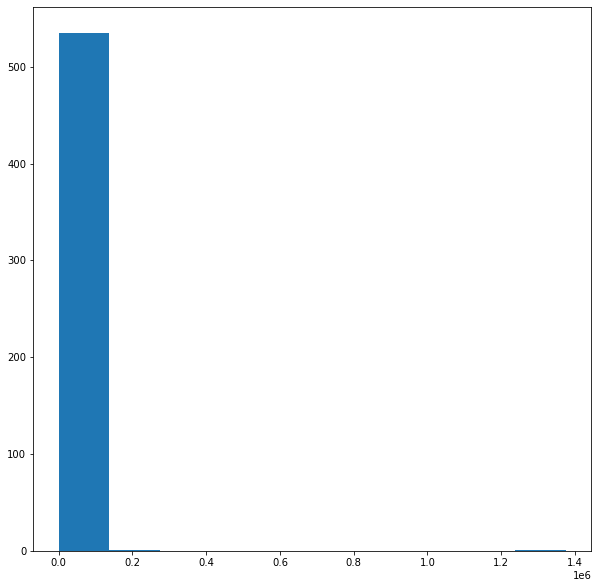

In [279]:
plt.figure(figsize=(10, 10))
plt.hist(df_visit_number.frequency)

In [280]:
df.visit_number.quantile(0.997)

99.0

In [281]:
df[df.visit_number > 99]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
82144,1120127072995841021.1633692931.1633692931,260799907.1630999549,2021-10-08,14:00:00,100,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1280x720,Chrome,Russia,Moscow,0
82145,1120127072995841021.1633708277.1633708277,260799907.1630999549,2021-10-08,18:00:00,101,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1280x720,Chrome,Russia,Moscow,0
82146,1120127072995841021.1633714642.1633714642,260799907.1630999549,2021-10-08,20:00:00,102,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1280x720,Chrome,Russia,Moscow,0
82147,1120127072995841021.1633759354.1633759354,260799907.1630999549,2021-10-09,09:00:00,103,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1280x720,Chrome,Russia,Moscow,0
82148,1120127072995841021.1633800298.1633800298,260799907.1630999549,2021-10-09,20:00:00,104,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1280x720,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842624,8981071101996302107.1640761024.1640761024,2091068565.1627651867,2021-12-29,09:57:04,134,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,nSReTmyFtbSjlPrTKoaX,desktop,Windows,desktop,1920x1080,Chrome,Russia,Moscow,0
1842625,8981071101996302107.1640767484.1640767484,2091068565.1627651867,2021-12-29,11:44:44,135,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,nSReTmyFtbSjlPrTKoaX,desktop,Windows,desktop,1920x1080,Chrome,Russia,Moscow,0
1842626,8981071101996302107.1640860116.1640860116,2091068565.1627651867,2021-12-30,13:28:36,136,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,nSReTmyFtbSjlPrTKoaX,desktop,Windows,desktop,1920x1080,Chrome,Russia,Moscow,0
1842627,8981071101996302107.1640936483.1640936483,2091068565.1627651867,2021-12-31,10:41:23,137,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,nSReTmyFtbSjlPrTKoaX,desktop,Windows,desktop,1920x1080,Chrome,Russia,Moscow,0


In [282]:
df[(df.visit_number > 99) & (df.goal_action == 1)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,goal_action
82227,1120127072995841021.1637854976.1637854976,260799907.1630999549,2021-11-25,18:42:56,185,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,ITfrGJNwVsHBGJMAKoct,desktop,Windows,desktop,1280x720,Chrome,Russia,Moscow,1
120498,1293119602511210313.1628514210.1628514212,301077869.1606838089,2021-08-09,16:00:00,118,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1440x900,Chrome,Russia,(not set),1
120499,1293119602511210313.1629209552.1629210183,301077869.1606838089,2021-08-17,17:00:00,127,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1440x900,Chrome,Russia,Moscow,1
137661,1371188243813352154.1625586210.1625586210,319254641.1622131418,2021-07-06,18:00:00,113,oZCzWSykfixnjMPDNjSU,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1280x720,Chrome,Russia,Moscow,1
137664,1371188243813352154.1625759461.1625759461,319254641.1622131418,2021-07-08,18:00:00,123,oZCzWSykfixnjMPDNjSU,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1920x1080,Chrome,Russia,Moscow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772464,8668749756044828325.1626181552.1626181552,2018350585.1607360165,2021-07-13,16:00:00,120,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,aXQzDWsJuGXeBXexNHjc,desktop,Android,desktop,1792x1120,Chrome,Russia,Saint Petersburg,1
1772465,8668749756044828325.1626183646.1626183646,2018350585.1607360165,2021-07-13,16:00:00,121,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1792x1120,Chrome,Russia,Saint Petersburg,1
1772466,8668749756044828325.1626197280.1626197280,2018350585.1607360165,2021-07-13,20:00:00,122,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,aXQzDWsJuGXeBXexNHjc,desktop,Android,desktop,1792x1120,Chrome,Russia,Saint Petersburg,1
1772474,8668749756044828325.1626879757.1626879757,2018350585.1607360165,2021-07-21,18:00:00,134,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Android,desktop,1792x1120,Chrome,Russia,Saint Petersburg,1


In [283]:
len(df[(df.visit_number > 99) & (df.goal_action == 1)]) / len(df[df.goal_action == 1])

0.006918076456672564

В данном случае распределение не является нормальным, поэтому правило трех сигм к нему не применимо. В целом, представить, что кто-то зайдет на один и тот же сайт сотню и больше раз вполне возможно, тем более что количество таких пользователей крайне мало по сравнению с более вероятными значениями (1 - 5 раз), что идёт в пользу правдоподобности данных.
Пока данные остаются без изменений, но в дальнейшем к ним можно будет вернуться.

## Feature Engineering

### Формирование новых признаков

In [287]:
df["visit_year"] = df.visit_date.apply(lambda x : x.year)
df["visit_month"] = df.visit_date.apply(lambda x : x.month)
df["visit_day"] = df.visit_date.apply(lambda x : x.day)
df["visit_hour"] = df.visit_time.apply(lambda x : x.hour)
df["visit_minute"] = df.visit_time.apply(lambda x : x.minute)
df["visit_second"] = df.visit_time.apply(lambda x : x.second)

In [288]:
df["len"] = df.device_screen_resolution.apply(lambda x : len(x.split("x")))

In [289]:
df[df.len == 1].index

Int64Index([130109, 210661, 229673, 290876, 354295, 470595, 1202364, 1591267], dtype='int64')

In [290]:
df.drop(df[df.len == 1].index, inplace=True)

In [291]:
df.drop(columns=["len"], inplace=True)

In [292]:
df["device_screen_width"] = df.device_screen_resolution.apply(lambda x : x.split("x")[0])
df["device_screen_height"] = df.device_screen_resolution.apply(lambda x : x.split("x")[1])

In [293]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,geo_city,goal_action,visit_year,visit_month,visit_day,visit_hour,visit_minute,visit_second,device_screen_width,device_screen_height
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Zlatoust,0,2021,11,24,14,36,32,360,720
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,Moscow,0,2021,11,14,8,21,30,385,854
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Krasnoyarsk,0,2021,12,28,2,42,6,360,720
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,...,Moscow,0,2021,5,29,5,0,0,393,786
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,Moscow,0,2021,5,29,5,0,0,393,786


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859032 entries, 0 to 1859039
Data columns (total 26 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_screen_resolution  object
 14  device_browser            object
 15  geo_country               object
 16  geo_city                  object
 17  goal_action               int64 
 18  visit_year                int64 
 19  visit_month               int64 
 20  visit_day                 int64 
 21  visit_ho

In [295]:
df["device_screen_width"] = df.device_screen_width.astype(int)
df["device_screen_height"] = df.device_screen_height.astype(int)

### Работа с категориальными признаками

In [296]:
columns_to_encode = ["utm_source", "utm_medium", "utm_campaign", "utm_adcontent", "utm_keyword", 
                     "device_category", "device_os", "device_brand", "device_browser", "geo_country", "geo_city"]

In [297]:
df.drop(columns=["session_id", "client_id", "visit_date", "visit_time"], axis=1, inplace=True)

In [298]:
df.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,...,geo_city,goal_action,visit_year,visit_month,visit_day,visit_hour,visit_minute,visit_second,device_screen_width,device_screen_height
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Zlatoust,0,2021,11,24,14,36,32,360,720
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,...,Moscow,0,2021,11,14,8,21,30,385,854
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,Krasnoyarsk,0,2021,12,28,2,42,6,360,720
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,...,Moscow,0,2021,5,29,5,0,0,393,786
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,...,Moscow,0,2021,5,29,5,0,0,393,786


In [299]:
ohe = OneHotEncoder(sparse_output=False, dtype=int, min_frequency=1800) # min_frequency < 0.1 % от всего датасета

In [300]:
df_to_encode =  df[columns_to_encode]

In [301]:
df_to_encode.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,Samsung Internet,Russia,Moscow
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk
3,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,Chrome,Russia,Moscow
4,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,Chrome,Russia,Moscow


In [302]:
for elem in columns_to_encode:
    print(f"{elem} : {df[elem].nunique()}")

utm_source : 290
utm_medium : 43
utm_campaign : 405
utm_adcontent : 275
utm_keyword : 1219
device_category : 3
device_os : 12
device_brand : 206
device_browser : 24
geo_country : 166
geo_city : 2546


In [303]:
values_enc = ohe.fit_transform(df_to_encode)
df[ohe.get_feature_names_out()] = values_enc

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = values_enc
C:\Users\79198\AppData\Local\Temp\ipykernel_7484\599903358.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [304]:
df.shape

(1859032, 316)

In [305]:
df.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,...,geo_city_Vidnoye,geo_city_Vladimir,geo_city_Vladivostok,geo_city_Volgograd,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Zheleznodorozhny,geo_city_infrequent_sklearn
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,0,0,0,0,0,0,0,0,0,1
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,...,0,0,0,0,0,0,0,0,0,0
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,...,0,0,0,0,0,0,0,0,0,0
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,...,0,0,0,0,0,0,0,0,0,0
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x786,...,0,0,0,0,0,0,0,0,0,0


In [306]:
df.drop(columns=columns_to_encode, axis=1, inplace=True)

In [307]:
df.drop(columns=["device_screen_resolution"], axis=1, inplace=True)

In [308]:
df.shape

(1859032, 304)

### Работа с числовыми признаками

In [309]:
df_for_scale = df[["visit_number", "visit_year", "visit_month", "visit_day",
                  "visit_hour", "visit_minute", "visit_second", "device_screen_width", "device_screen_height"]]

In [310]:
scaler = MinMaxScaler()

In [311]:
values_scl = scaler.fit_transform(df_for_scale)
df[scaler.get_feature_names_out()] = values_scl
df.head()

,visit_number,goal_action,visit_year,visit_month,visit_day,visit_hour,visit_minute,visit_second,device_screen_width,device_screen_height,...,geo_city_Vidnoye,geo_city_Vladimir,geo_city_Vladivostok,geo_city_Volgograd,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Zheleznodorozhny,geo_city_infrequent_sklearn
0,0.000000,0,0.0,0.857143,0.766667,0.608696,0.610169,0.542373,0.06077,0.0360,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,0,0.0,0.857143,0.433333,0.347826,0.355932,0.508475,0.06499,0.0427,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0.0,1.000000,0.900000,0.086957,0.711864,0.101695,0.06077,0.0360,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0.0,0.000000,0.933333,0.217391,0.000000,0.000000,0.06634,0.0393,...,0,0,0,0,0,0,0,0,0,0
4,0.001776,0,0.0,0.000000,0.933333,0.217391,0.000000,0.000000,0.06634,0.0393,...,0,0,0,0,0,0,0,0,0,0


In [312]:
df.visit_year.value_counts()

0.0    1859032
Name: visit_year, dtype: int64

In [313]:
df.drop("visit_year", axis=1, inplace=True)
df.head()

,visit_number,goal_action,visit_month,visit_day,visit_hour,visit_minute,visit_second,device_screen_width,device_screen_height,utm_source_BHcvLfOaCWvWTykYqHVe,...,geo_city_Vidnoye,geo_city_Vladimir,geo_city_Vladivostok,geo_city_Volgograd,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Zheleznodorozhny,geo_city_infrequent_sklearn
0,0.000000,0,0.857143,0.766667,0.608696,0.610169,0.542373,0.06077,0.0360,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,0,0.857143,0.433333,0.347826,0.355932,0.508475,0.06499,0.0427,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,1.000000,0.900000,0.086957,0.711864,0.101695,0.06077,0.0360,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0.000000,0.933333,0.217391,0.000000,0.000000,0.06634,0.0393,0,...,0,0,0,0,0,0,0,0,0,0
4,0.001776,0,0.000000,0.933333,0.217391,0.000000,0.000000,0.06634,0.0393,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling

### Формирование тренировочного и тестового датасетов

В данном случае количество строк со значением целевой переменной, равной 1, значительно меньше итогового количества данных (всего около 3 % от всего датасета), поэтому при обучении на всём датасете модели будет недостаточно данных с целевой переменной == 1 для корректного обучения. В результате она будет предсказывать все сочетания входных признаков как итоговые нули, что есть плохо. Чтобы этого избежать, принято решение создать тренировочный датасет из всех строк с goal_action == 1 и уравновешивающим количеством строк с goal_action == 0. Затем точность получившейся модели проверить на итоговом датасете.

In [314]:
df1 = df[df.goal_action == 1]
df2 = df[df.goal_action == 0].sample(50000, random_state=42)
df3 = df1.append(df2, ignore_index=True)

C:\Users\79198\AppData\Local\Temp\ipykernel_7484\2158596316.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2, ignore_index=True)


In [316]:
# признаки времени удаляются потому, что в итоговых запросах они не фигурируют, хотя при сохранении этих признаков
# модель даёт гораздо более точные показания, что логично: время посещения сайта и количесвто посещений веско влияют 
# на принятие целевого решения пользователем
x = df3.drop(["goal_action", "visit_number", "visit_month", "visit_day", "visit_hour", "visit_minute", "visit_second"], axis=1)
y = df3.goal_action
x_goal = df.drop(["goal_action", "visit_number", "visit_month", "visit_day", "visit_hour", "visit_minute", "visit_second"], axis=1)
y_goal = df.goal_action

### Работа с моделями

In [317]:
logreg = LogisticRegression(max_iter=10000, solver="newton-cholesky")
forest = RandomForestClassifier(random_state=42)
MLP = MLPClassifier(random_state=42)

Логистическая регрессия

In [318]:
logreg = LogisticRegression(random_state=42, max_iter=1000, solver="newton-cholesky")
logreg.fit(x, y)

LogisticRegression(max_iter=1000, random_state=42, solver='newton-cholesky')

In [320]:
pred = logreg.predict(x_goalgoal)
confusion_matrix(y_goal, pred)

array([[962337, 846392],
       [ 14110,  36193]], dtype=int64)

In [322]:
accuracy_score(y_goal, pred)

0.5371236213255071

In [323]:
roc_auc_score(y_goal, pred)

0.6257756717198095

Случайный лес

In [324]:
forest = RandomForestClassifier(random_state=42)
forest.fit(x, y)

RandomForestClassifier(random_state=42)

In [325]:
pred = forest.predict(x_goal)
confusion_matrix(y_goal, pred)

array([[1021923,  786806],
       [   8515,   41788]], dtype=int64)

In [326]:
accuracy_score(y_goal, pred)

0.5721854169266586

In [327]:
roc_auc_score(y_goal, pred)

0.6978604446764058

MLP

In [328]:
MLP = MLPClassifier(random_state=42)
MLP.fit(x, y)

C:\Users\79198\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [329]:
pred = MLP.predict(x_goal)
confusion_matrix(y_goal, pred)

array([[1057033,  751696],
       [  14259,   36044]], dtype=int64)

In [330]:
accuracy_score(y_goal, pred)

0.5879818098881568

In [331]:
roc_auc_score(y_goal, pred)

0.6504721448528494

### Сохранение модели

In [332]:
with open("model.pickle", "wb") as file:
    dill.dump(forest, file)